In [1]:
pwd

'G:\\end_to_end_ml\\hate_speech_classification\\notebook'

In [2]:
import sys

In [3]:
print(sys.executable)

G:\end_to_end_ml\venv\Scripts\python.exe


## Import the necessary libraries

In [4]:
import os
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 256)

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmucd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [8]:
import tensorflow

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import pad_sequences

## Read the Data

In [10]:
df = pd.read_csv('dataset/tweet_data.csv')

In [11]:
df.head()

,tweet,label
0,"Entitled, obnoxious, defensive, lying weasel. This thing is to make decisions that may affect my life? He is a women hater.",0
1,Thank you and for what you did for the women and survivors this week. \n,0
2,"Knitting (s) &amp; getting ready for January 19, 2019.",0
3,"Yep just like triffeling women weaponized their poon!! Wonder if Kamala Harris ever extorted Willy Brown after throwing the poon on him, oh yeh, that how she got her first job me too is a JOKE!",1
4,"No, the President wants to end movement posing as the movement.",0


In [12]:
df['label'].unique()

array([0, 1], dtype=int64)

In [13]:
df['label'].value_counts()

label
0    713270
1    114524
Name: count, dtype: int64

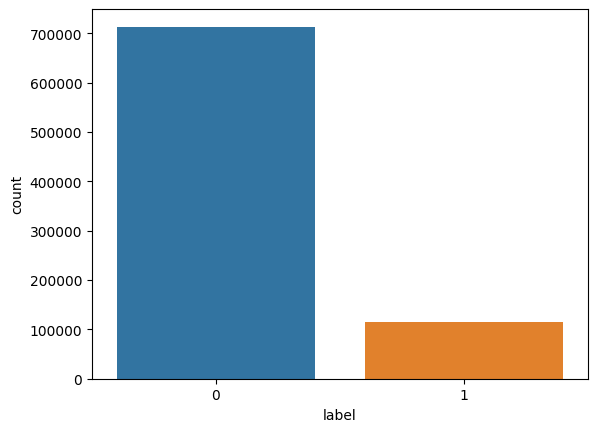

In [14]:
sns.countplot(x ='label', data=df);